# Figure 3: Ranking Drugs

1. Find drugs used for nash: https://www.nature.com/articles/s41575-020-00408-y - DONE
2. Find controls: ATC browser https://go.drugbank.com/atc/L04 -TODO- find 10-20 of these


Nash-adjacent
- NSAIDs
- Anti-inflammatories


Negative controls
- drugs that affect completely different body systems than NASH

3. Identify drug targets - essentially just google target and find gene symbol 
    - genecards is useful for gene symbols/synonyms
    - pubchem sometimes has symbols of drug targets listed in the description
    - otherwise, find the description of the target in literature and then look up
    
4. Check if gene symbol is in embeddings.csv

4. Add drug target and label to drug.csv

Run all cells to generate plots. After including all drugs, modify plots to show the data better.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load scored genes using final trained model

In [3]:
scores = pd.read_csv('../../results/final_model_svc/all_gene_scores.csv', index_col=0)

## 2. Load table of drugs, targets, and their indications

In [12]:
drugs = pd.read_csv('../../data/gene_maps/drug.csv', index_col=0)

## 3. Join with scores

In [35]:
drugs_scores = drugs.join(scores, how='inner').sort_values('score', ascending=False).reset_index()

In [73]:
drugs_scores['drug-target'] = drugs_scores.apply(lambda row: row['module'] + ' - ' + row['index'], axis=1)

### Plot drugs and scores - separate drug targets

<AxesSubplot:xlabel='score', ylabel='drug-target'>

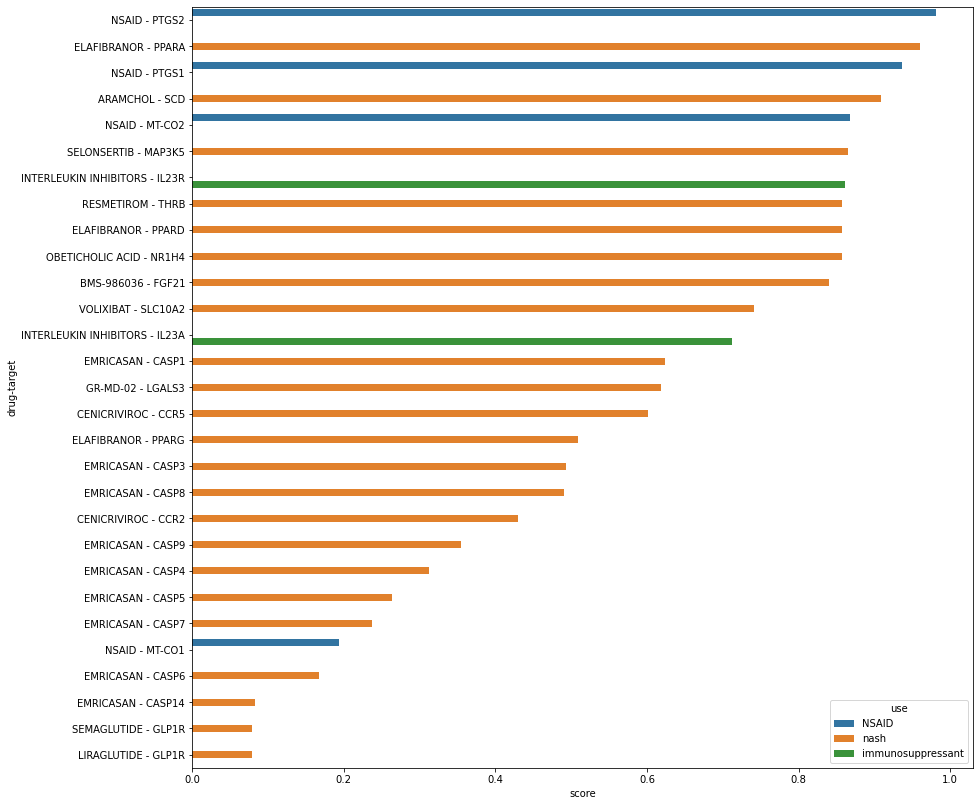

In [75]:
plt.figure(figsize=(14,14))
sns.barplot(y='drug-target', x='score', hue='use', data=drugs_scores, ci=None)


## Plot - just drug names and scores

In [76]:
# use the gene target that has the highest score from the model
best_scoring = pd.DataFrame(drugs_scores.groupby('module').max()).sort_values('score', ascending=False).reset_index()

<AxesSubplot:xlabel='score', ylabel='module'>

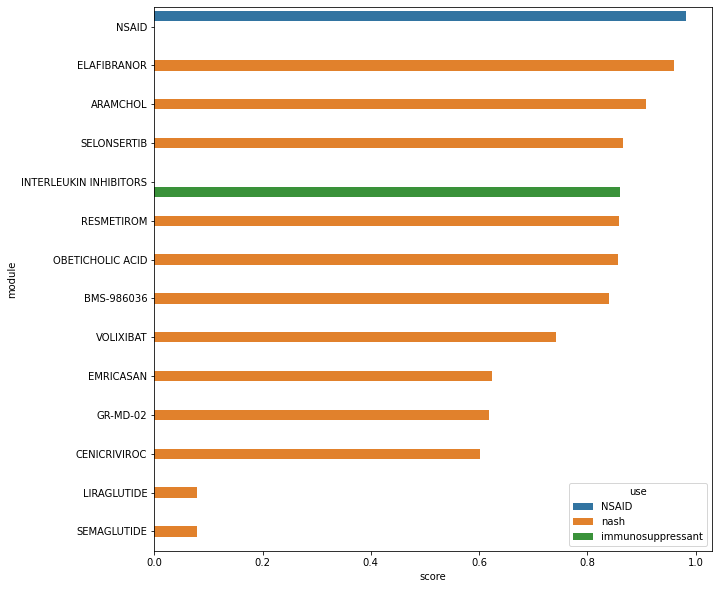

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(y='module', x='score', hue='use', data=best_scoring, ci=None)